In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
fandango=pd.read_csv("fandango_scrape.csv")

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

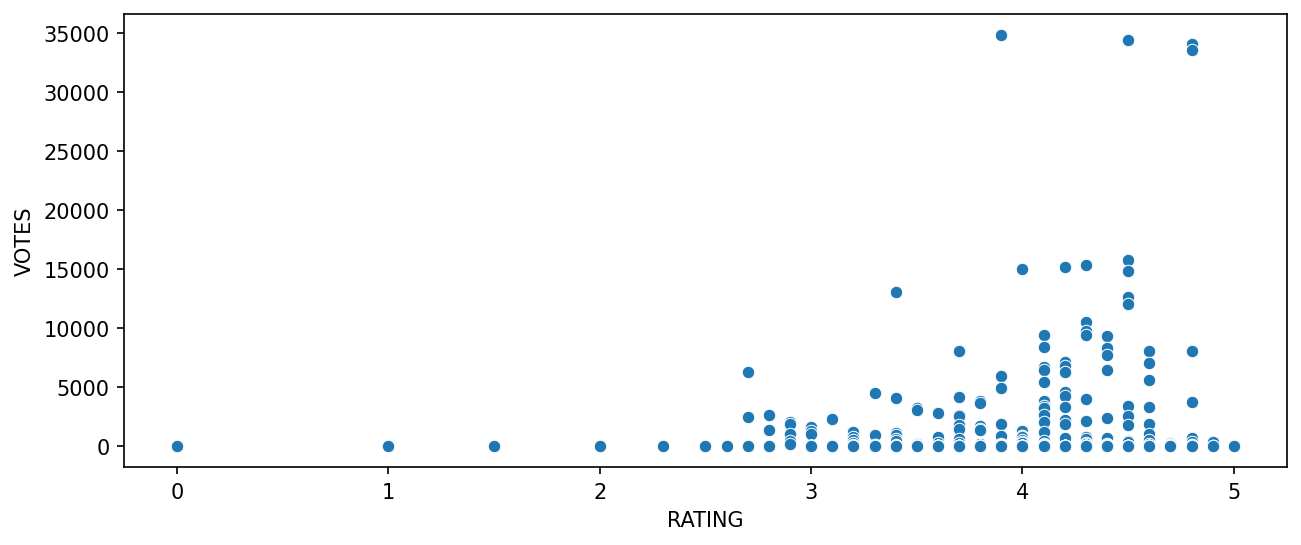

In [9]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=fandango,y='VOTES',x='RATING')

In [10]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [12]:
title='Film Title Name (Year)'
title.split('(')[-1].replace(')','')

'Year'

In [13]:
fandango['YEAR']=fandango['FILM'].apply(lambda title:title.split('(')[-1].replace(')',''))

In [15]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

<AxesSubplot:xlabel='YEAR', ylabel='count'>

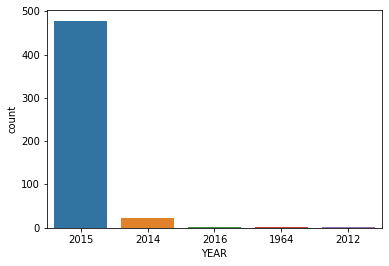

In [16]:
sns.countplot(data=fandango, x='YEAR')

In [18]:
fandango.nlargest(10,'STARS')

,FILM,STARS,RATING,VOTES,YEAR
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
10,Cinderella (2015),5.0,4.5,12640,2015
11,Ant-Man (2015),5.0,4.5,12055,2015
19,Straight Outta Compton (2015),5.0,4.8,8096,2015
21,The Imitation Game (2014),5.0,4.6,8055,2014
24,Selma (2014),5.0,4.6,7025,2014
32,Southpaw (2015),5.0,4.6,5597,2015
43,Dragon Ball Z: Resurrection 'F' (2015),5.0,4.8,3740,2015


In [25]:
len(fandango[fandango['VOTES']<=0])

69

In [26]:
fan_rewiwed=fandango[fandango['VOTES']>0]

In [35]:
fan_rewiwed 

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


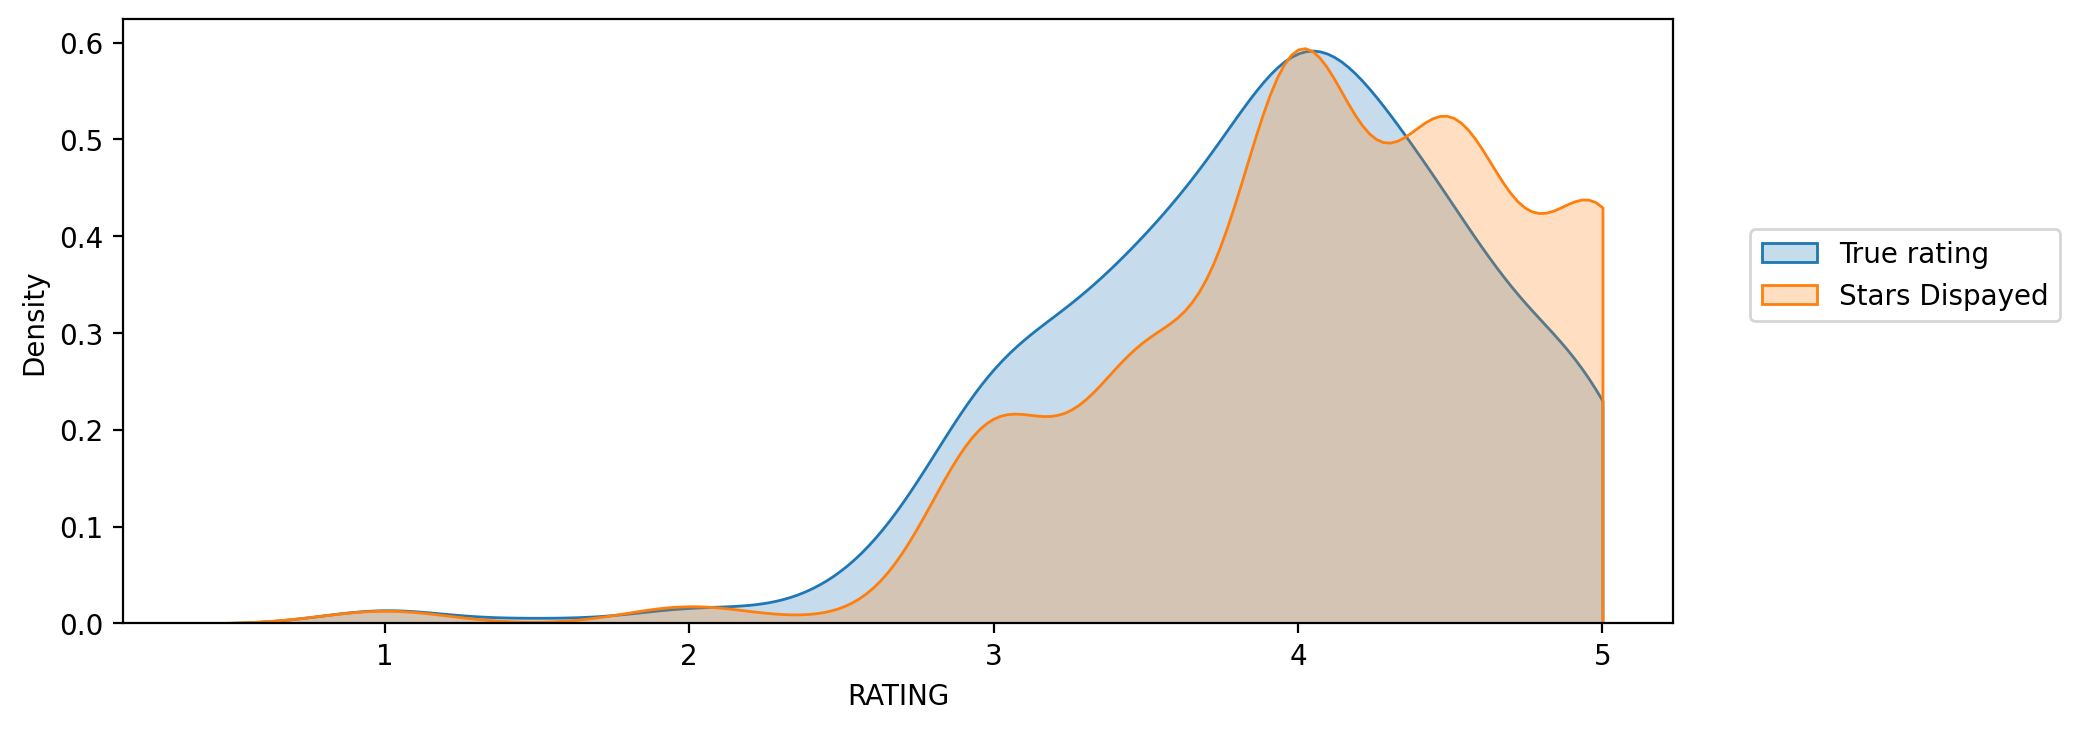

In [36]:
plt.figure(figsize=(10,4),dpi=200)
sns.kdeplot(data=fan_rewiwed,x='RATING', clip=[0,5], fill=True, label="True rating") 
sns.kdeplot(data=fan_rewiwed,x='STARS', clip=[0,5], fill=True, label="Stars Dispayed") 

plt.legend(loc=(1.05,0.5))

In [47]:
fan_rewiwed['STARS_DIFF']=fandango['STARS']-fandango['RATING']

/var/folders/8d/wwwj4v6n7h1db0y82bcw5d500000gn/T/ipykernel_61936/3653711723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_rewiwed['STARS_DIFF']=fandango['STARS']-fandango['RATING']


In [49]:

fandango

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015,0.0
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015,0.0
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015,0.0
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964,0.0


In [50]:
fan_rewiwed['STARS_DIFF']=fan_rewiwed['STARS_DIFF'].round(2)

/var/folders/8d/wwwj4v6n7h1db0y82bcw5d500000gn/T/ipykernel_61936/673992419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_rewiwed['STARS_DIFF']=fan_rewiwed['STARS_DIFF'].round(2)


<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

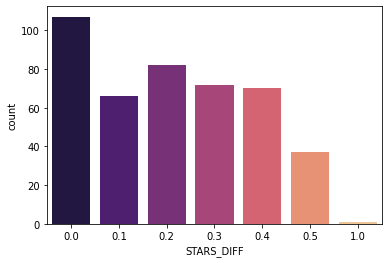

In [52]:
sns.countplot(data=fan_rewiwed,x='STARS_DIFF',palette='magma')

In [53]:
fan_rewiwed[fan_rewiwed['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0
